In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
plt.rcParams['figure.figsize']=(10,6)
sns.set_style('darkgrid')

In [3]:
# Load the data
df = pd.read_csv('pizza_sales.csv', parse_dates=['order_date'], dayfirst=True)

In [4]:
# View the first five rows
df.head()

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3,2,five_cheese_l,1,2015-01-01,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4,2,ital_supr_l,1,2015-01-01,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5,2,mexicana_m,1,2015-01-01,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


In [5]:
# View the last five rows
df.tail()

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
48615,48616,21348,ckn_alfredo_m,1,2015-12-31,21:23:10,16.75,16.75,M,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A...",The Chicken Alfredo Pizza
48616,48617,21348,four_cheese_l,1,2015-12-31,21:23:10,17.95,17.95,L,Veggie,"Ricotta Cheese, Gorgonzola Piccante Cheese, Mo...",The Four Cheese Pizza
48617,48618,21348,napolitana_s,1,2015-12-31,21:23:10,12.00,12.00,S,Classic,"Tomatoes, Anchovies, Green Olives, Red Onions,...",The Napolitana Pizza
48618,48619,21349,mexicana_l,1,2015-12-31,22:09:54,20.25,20.25,L,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza
48619,48620,21350,bbq_ckn_s,1,2015-12-31,23:02:05,12.75,12.75,S,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",The Barbecue Chicken Pizza


In [6]:
# Get the shape # of rows and columns
df.shape

(48620, 12)

In [7]:
# Check the column names
df.columns

Index(['pizza_id', 'order_id', 'pizza_name_id', 'quantity', 'order_date',
       'order_time', 'unit_price', 'total_price', 'pizza_size',
       'pizza_category', 'pizza_ingredients', 'pizza_name'],
      dtype='object')

In [8]:
# Check missing values
df.isna().sum()

pizza_id             0
order_id             0
pizza_name_id        0
quantity             0
order_date           0
order_time           0
unit_price           0
total_price          0
pizza_size           0
pizza_category       0
pizza_ingredients    0
pizza_name           0
dtype: int64

In [9]:
# Convert the 'order_time' to time data type
df['order_time'] = pd.to_datetime(df['order_time'])

In [10]:
# Check for info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   pizza_id           48620 non-null  int64         
 1   order_id           48620 non-null  int64         
 2   pizza_name_id      48620 non-null  object        
 3   quantity           48620 non-null  int64         
 4   order_date         48620 non-null  datetime64[ns]
 5   order_time         48620 non-null  datetime64[ns]
 6   unit_price         48620 non-null  float64       
 7   total_price        48620 non-null  float64       
 8   pizza_size         48620 non-null  object        
 9   pizza_category     48620 non-null  object        
 10  pizza_ingredients  48620 non-null  object        
 11  pizza_name         48620 non-null  object        
dtypes: datetime64[ns](2), float64(2), int64(3), object(5)
memory usage: 4.5+ MB


In [11]:
# Check data types
df.dtypes

pizza_id                      int64
order_id                      int64
pizza_name_id                object
quantity                      int64
order_date           datetime64[ns]
order_time           datetime64[ns]
unit_price                  float64
total_price                 float64
pizza_size                   object
pizza_category               object
pizza_ingredients            object
pizza_name                   object
dtype: object

In [12]:
# Descriptive statistics 
df.describe().round(2).transpose()

,count,mean,std,min,25%,50%,75%,max
pizza_id,48620.0,24310.50,14035.53,1.00,12155.75,24310.5,36465.25,48620.00
order_id,48620.0,10701.48,6180.12,1.00,5337.00,10682.5,16100.00,21350.00
quantity,48620.0,1.02,0.14,1.00,1.00,1.0,1.00,4.00
unit_price,48620.0,16.49,3.62,9.75,12.75,16.5,20.25,35.95
total_price,48620.0,16.82,4.44,9.75,12.75,16.5,20.50,83.00


In [13]:
# Check for unique values in pizza size
df['pizza_size'].unique()

array(['M', 'L', 'S', 'XL', 'XXL'], dtype=object)

In [14]:
# Check for unique values in pizza category 
df['pizza_category'].unique()

array(['Classic', 'Veggie', 'Supreme', 'Chicken'], dtype=object)

In [15]:
# Check for unique values in pizza name
df['pizza_name'].unique()

array(['The Hawaiian Pizza', 'The Classic Deluxe Pizza',
       'The Five Cheese Pizza', 'The Italian Supreme Pizza',
       'The Mexicana Pizza', 'The Thai Chicken Pizza',
       'The Prosciutto and Arugula Pizza', 'The Barbecue Chicken Pizza',
       'The Greek Pizza', 'The Spinach Supreme Pizza',
       'The Green Garden Pizza', 'The Italian Capocollo Pizza',
       'The Spicy Italian Pizza', 'The Spinach Pesto Pizza',
       'The Vegetables + Vegetables Pizza', 'The Southwest Chicken Pizza',
       'The California Chicken Pizza', 'The Pepperoni Pizza',
       'The Chicken Pesto Pizza', 'The Big Meat Pizza',
       'The Soppressata Pizza', 'The Four Cheese Pizza',
       'The Napolitana Pizza', 'The Calabrese Pizza',
       'The Italian Vegetables Pizza', 'The Mediterranean Pizza',
       'The Pepper Salami Pizza', 'The Spinach and Feta Pizza',
       'The Sicilian Pizza', 'The Chicken Alfredo Pizza',
       'The Pepperoni, Mushroom, and Peppers Pizza',
       'The Brie Carre Pizza'

In [16]:
# Total Revenue
total_revenue = df["total_price"].sum()
total_revenue

817860.05

In [17]:
# Total Quantity Sold
total_quantity_sold = df["quantity"].sum()
total_quantity_sold

49574

In [18]:
# Calculate the average number of pizzas per order
average_pizzas_per_order = total_quantity_sold / df["order_id"].nunique()
print(round(average_pizzas_per_order,2))

2.32


In [19]:
# Average Unit Price
average_unit_price = df["unit_price"].mean().round(2)
average_unit_price

16.49

In [20]:
# Most Popular Pizza
most_popular_pizza = df["pizza_name"].mode().values[0]
most_popular_pizza 

'The Classic Deluxe Pizza'

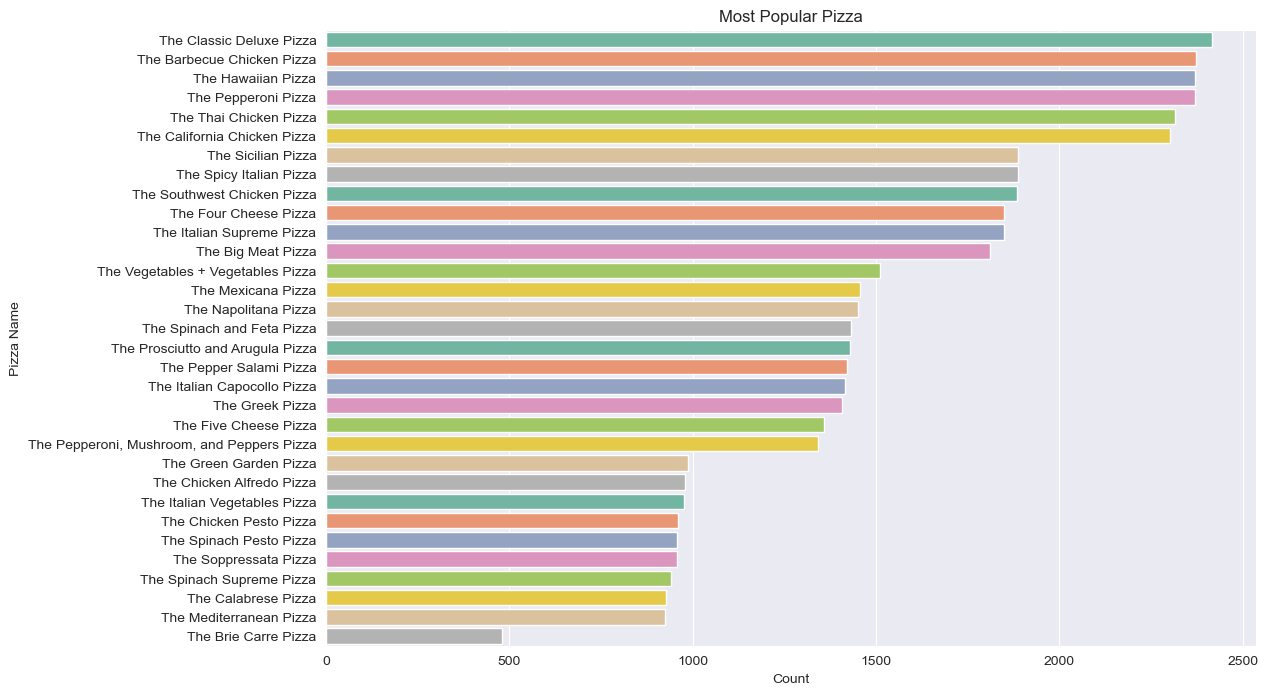

In [21]:
# Value of pizza name to determine the most popular pizza
popular_pizza = df["pizza_name"].value_counts().reset_index().rename(columns={'index':'Pizza Name','pizza_name':'Count'})

# Plot 
plt.figure(figsize=(12,8))
sns.barplot(data= popular_pizza, y='Pizza Name', x='Count', palette='Set2')
plt.title('Most Popular Pizza')
plt.show()      

In [22]:
# Busiest Order Date
busiest_order_date = df["order_date"].mode().values[0]
busiest_order_date

numpy.datetime64('2015-11-26T00:00:00.000000000')

In [23]:
# Busiest Order Time
busiest_order_time = df["order_time"].mode().values[0]
busiest_order_time

numpy.datetime64('2023-07-22T12:32:00.000000000')

In [24]:
# Revenue by Pizza Size
revenue_by_size = df.groupby("pizza_size")["total_price"].sum().reset_index()
revenue_by_size

,pizza_size,total_price
0,L,375318.70
1,M,249382.25
2,S,178076.50
3,XL,14076.00
4,XXL,1006.60


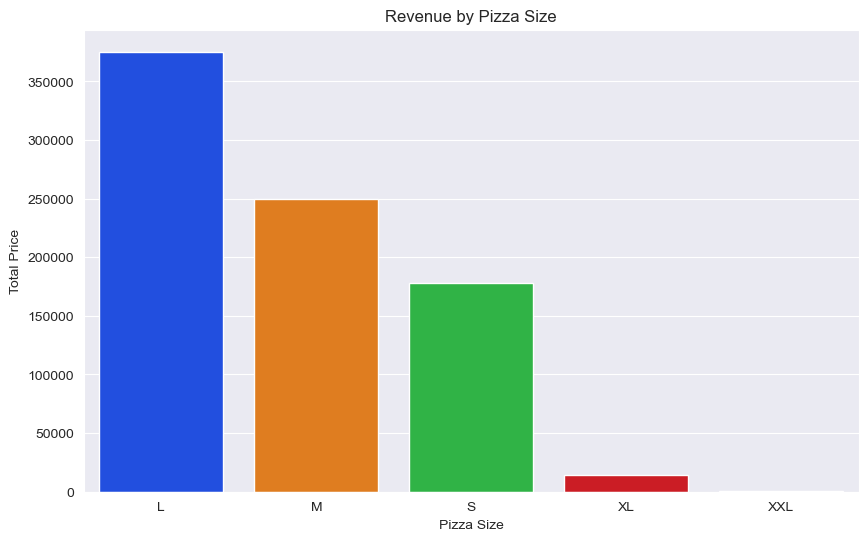

In [25]:
# Plot revenue by pizza size
sns.barplot(data= revenue_by_size, x='pizza_size', y='total_price', palette='bright')
plt.xlabel('Pizza Size')
plt.ylabel('Total Price')
plt.title('Revenue by Pizza Size')
plt.show()      

In [26]:
# Revenue by Pizza Category
revenue_by_category = df.groupby("pizza_category")["total_price"].sum().reset_index().sort_values('total_price', ascending=False)
revenue_by_category

,pizza_category,total_price
1,Classic,220053.10
2,Supreme,208197.00
0,Chicken,195919.50
3,Veggie,193690.45


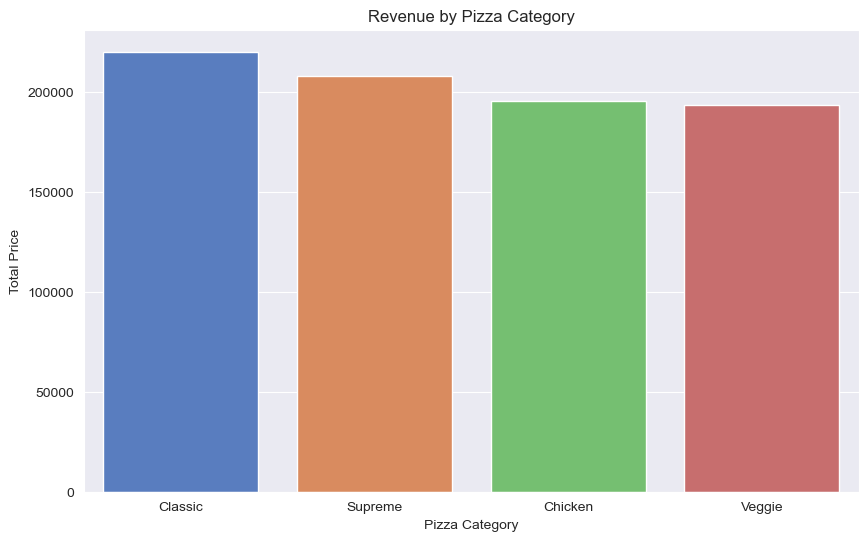

In [27]:
# Plot revenue by pizza category
sns.barplot(data= revenue_by_category, x='pizza_category', y='total_price', palette='muted')
plt.xlabel('Pizza Category')
plt.ylabel('Total Price')
plt.title('Revenue by Pizza Category')
plt.show() 

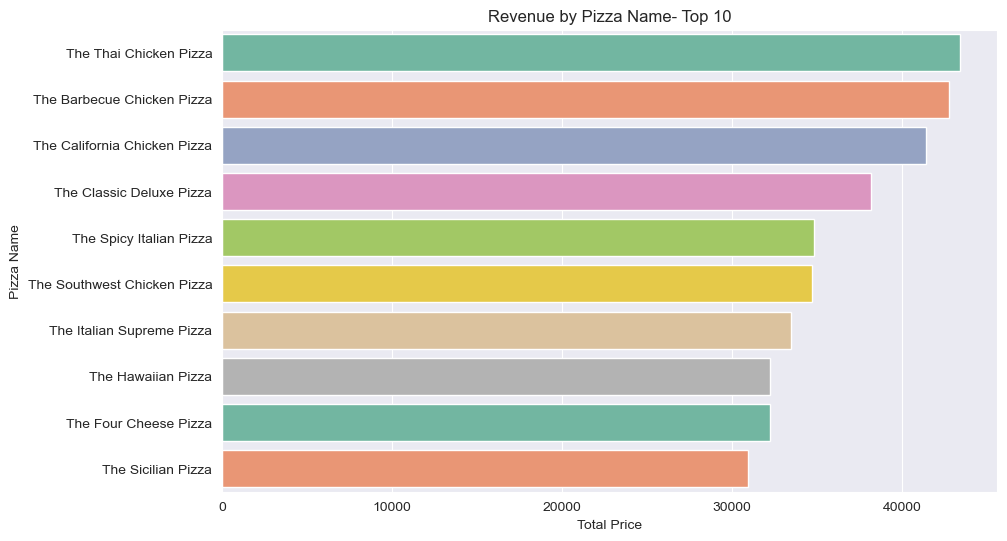

In [28]:
#Revenue by pizza name
most_pizza_profit  = df.groupby('pizza_name')['total_price'].sum().reset_index().sort_values('total_price', ascending=False).head(10)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(data= most_pizza_profit, y='pizza_name', x='total_price', palette='Set2')
plt.ylabel('Pizza Name')
plt.xlabel('Total Price')
plt.title('Revenue by Pizza Name- Top 10')
plt.show() 

In [29]:
# Average Order Value
average_order_value = df.groupby("order_id")["total_price"].sum().mean().round(2)
average_order_value

38.31

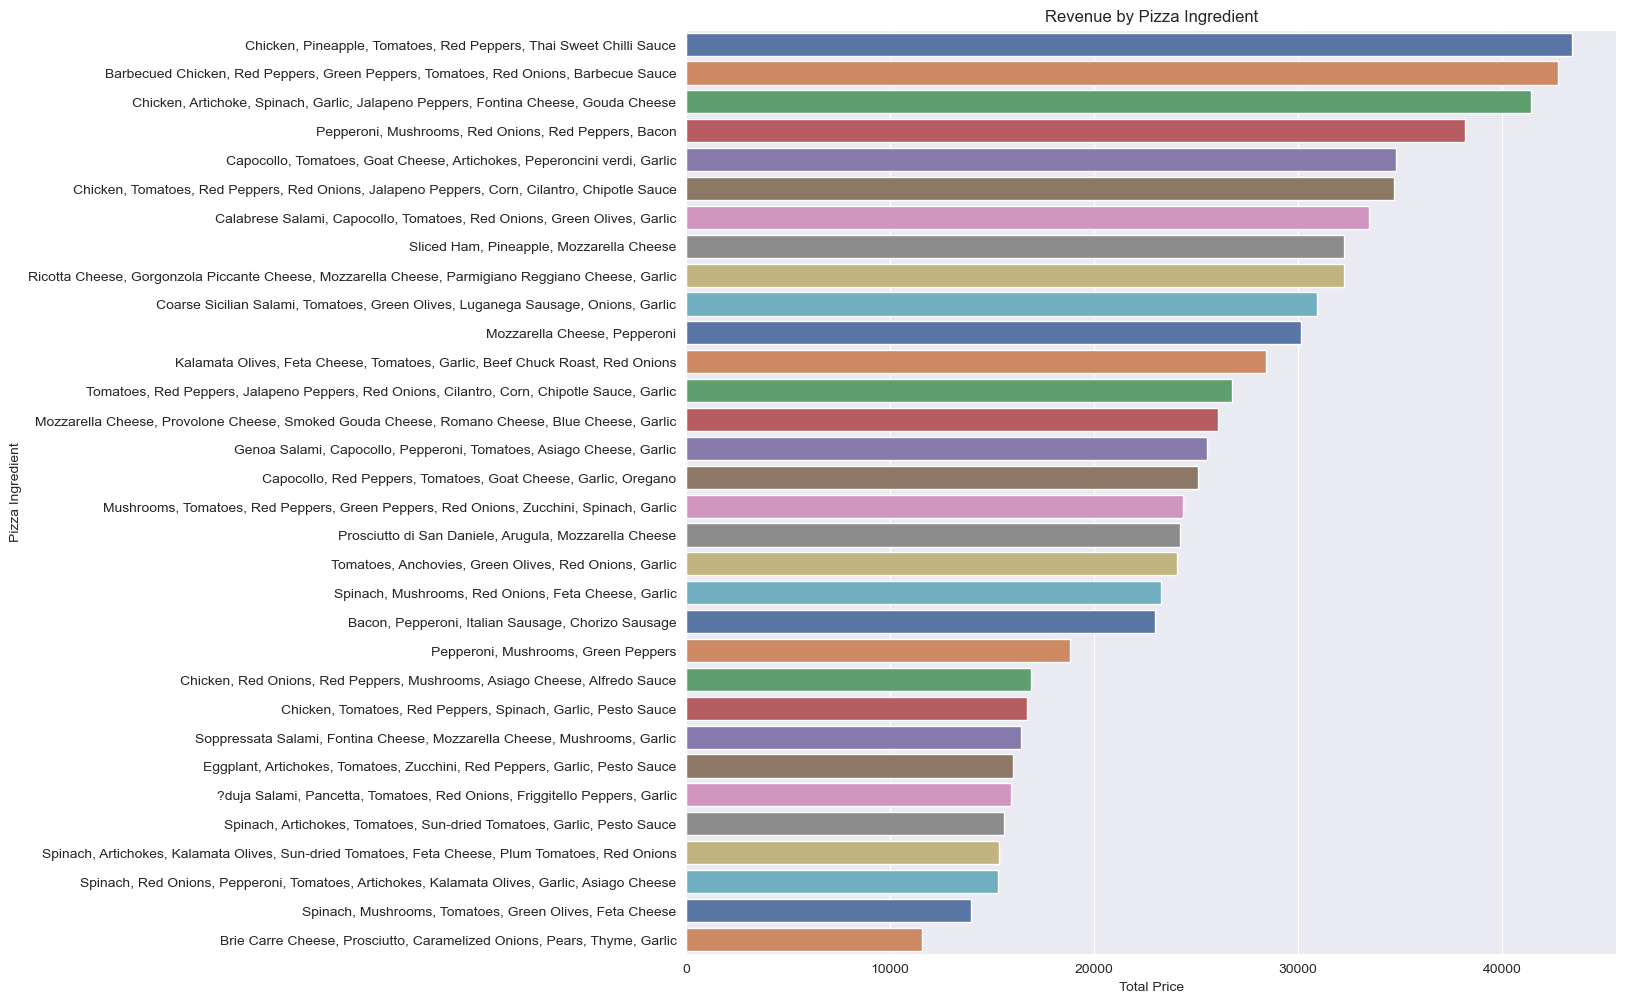

In [30]:
# Revenue by Pizza Ingredient
revenue_by_ingredient = df.groupby("pizza_ingredients")["total_price"].sum().reset_index().sort_values('total_price', ascending=False)
revenue_by_ingredient

# Plot 
plt.figure(figsize=(12,12))
sns.barplot(data= revenue_by_ingredient, y='pizza_ingredients', x='total_price', palette='deep')
plt.xlabel('Total Price')
plt.ylabel('Pizza Ingredient')
plt.title('Revenue by Pizza Ingredient')
plt.show() 

In [31]:
# Order Frequency
order_frequency = df["order_id"].nunique()
order_frequency

21350

In [32]:
# Extract the day of the week from the "order_date"
df["day_of_week"] = df["order_date"].dt.day_name()

# Extract the month name from the "order_date" 
df["month_name"] = df["order_date"].dt.month_name()

# Extract the month from the "order_date"
df["order_month"] = df["order_date"].dt.month

In [33]:
# Identify the day of the week with the most pizza orders
most_orders_day = df["day_of_week"].mode().values[0]
most_orders_day

'Friday'

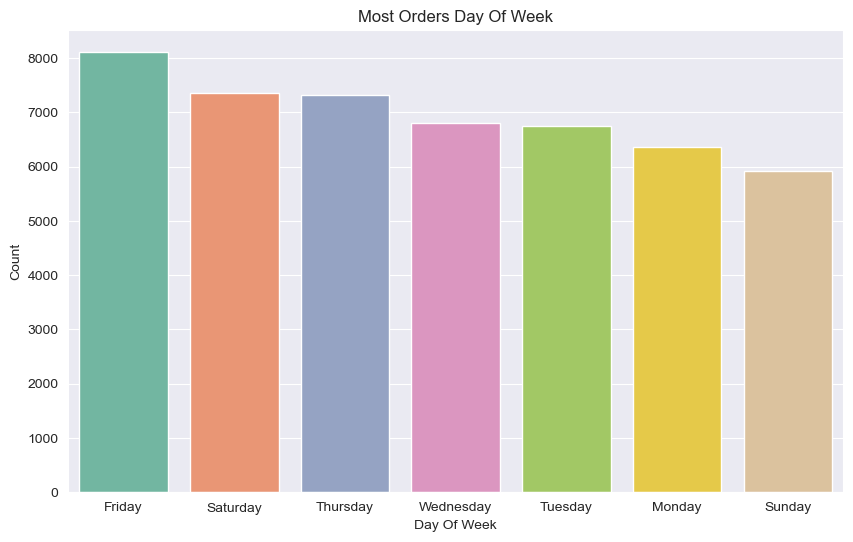

In [34]:
# Value count of day of the week 
most_orders_day_of_week = df.day_of_week.value_counts().reset_index().rename(columns={'index':'day_of_week','day_of_week':'Count'})
most_orders_day_of_week

sns.barplot(data= most_orders_day_of_week, x='day_of_week', y='Count', palette='Set2')
plt.xlabel('Day Of Week')
plt.ylabel('Count')
plt.title('Most Orders Day Of Week')
plt.show() 

In [35]:
# Identify the month with the most pizza orders
most_orders_month1 = df["month_name"].mode().values[0]
most_orders_month1

'July'

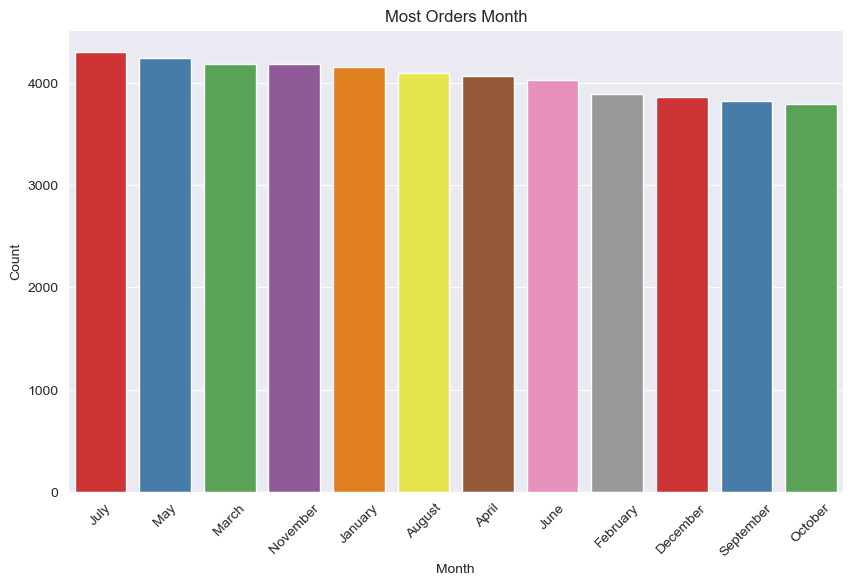

In [36]:
# Value count of day of the week 
most_orders_month = df.month_name.value_counts().reset_index().rename(columns={'index':'month_name','month_name':'Count'})
most_orders_month
# Plot
sns.barplot(data= most_orders_month, x='month_name', y='Count', palette='Set1')
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Most Orders Month')
plt.xticks(rotation=45)
plt.show() 

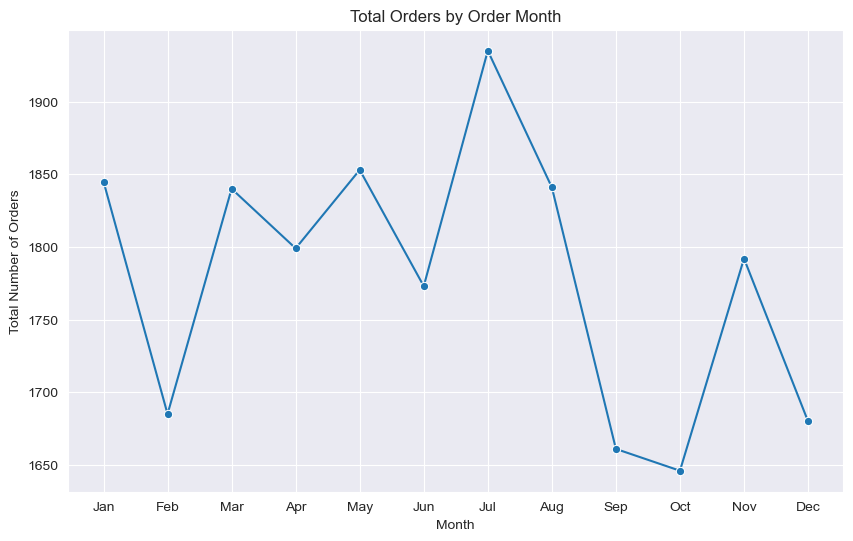

In [37]:
# Calculate the total number of orders for each month
total_orders_by_month = df.groupby("order_month")["order_id"].nunique()

# Line plot
sns.lineplot(x=total_orders_by_month.index, y=total_orders_by_month.values, marker='o')
plt.xlabel("Month")
plt.ylabel("Total Number of Orders")
plt.title("Total Orders by Order Month")
plt.xticks(total_orders_by_month.index, ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.show()

In [38]:
# Combine all pizza ingredients into a single list
all_ingredients = ', '.join(df["pizza_ingredients"]).split(', ')

# Create Series to count the occurrences of each ingredient
ingredient_counts = pd.Series(all_ingredients).value_counts()

# Identify the most common pizza ingredient
most_common_ingredient = ingredient_counts.idxmax()
most_common_ingredient

'Garlic'

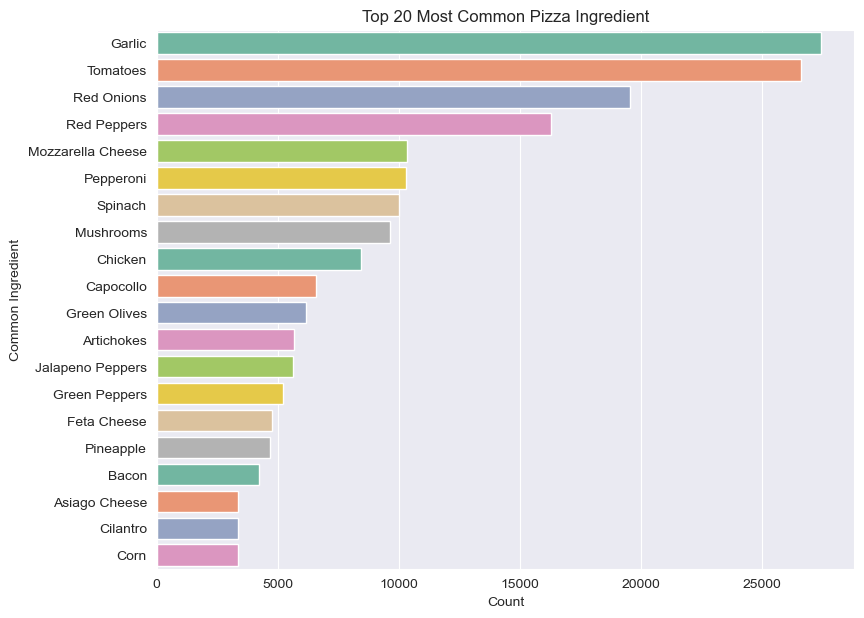

In [39]:
common_ingredient = ingredient_counts.reset_index().rename(columns={'index':'common_ingredient',0:'Count'}).head(20)

# Plot
plt.figure(figsize=(9,7))
sns.barplot(data= common_ingredient, y='common_ingredient', x='Count', palette='Set2')
plt.xlabel('Count')
plt.ylabel('Common Ingredient')
plt.title('Top 20 Most Common Pizza Ingredient')
plt.show() 